In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [12]:
df= sns.load_dataset('tips')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [15]:

# Calculate the average tip amount for each day of the week
average_tip_per_day = df.groupby('day')['tip'].mean().reset_index()

# Sort the days by the average tip amount in ascending order
sorted_days = average_tip_per_day.sort_values(by='tip')

# Get the day with the lowest average tip amount
hardest_day_to_work = sorted_days.iloc[0]['day']

print(f"The hardest day to work is: {hardest_day_to_work}")


The hardest day to work is: Fri


In [32]:
sorted_days_by_day= average_tip_per_day.sort_values(by='tip',ascending=False)
best_day_to_work = sorted_days_by_day.iloc[0]['day']
print(f"The best day to work is: {best_day_to_work}")

The best day to work is: Sun


In [26]:
# Calculate the average total bill and tip amount for smokers and non-smokers
averages_by_smoking_status = df.groupby('smoker').agg({
    'total_bill': 'mean',
    'tip': 'mean'
}).reset_index()

# Display the results
print(averages_by_smoking_status)

  smoker  total_bill       tip
0    Yes   20.756344  3.008710
1     No   19.188278  2.991854


In [27]:
df.groupby(['day','size']).sum()

C:\Users\gulsa\AppData\Local\Temp\ipykernel_16088\3791730824.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['day','size']).sum()


total_bill     tip
day  size                    
Thur 1          10.07    1.83
     2         727.53  117.24
     3          76.64   10.77
     4         149.75   21.09
     5          41.19    5.00
     6          91.15   15.90
Fri  1           8.58    1.92
     2         261.15   42.31
     3          15.98    3.00
     4          40.17    4.73
     5           0.00    0.00
     6           0.00    0.00
Sat  1          10.32    2.00
     2         892.37  133.43
     3         459.17   68.36
     4         388.39   53.61
     5          28.15    3.00
     6           0.00    0.00
Sun  1           0.00    0.00
     2         684.84  109.86
     3         332.76   46.81
     4         480.39   73.58
     5          81.00   12.14
     6          48.17    5.00

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


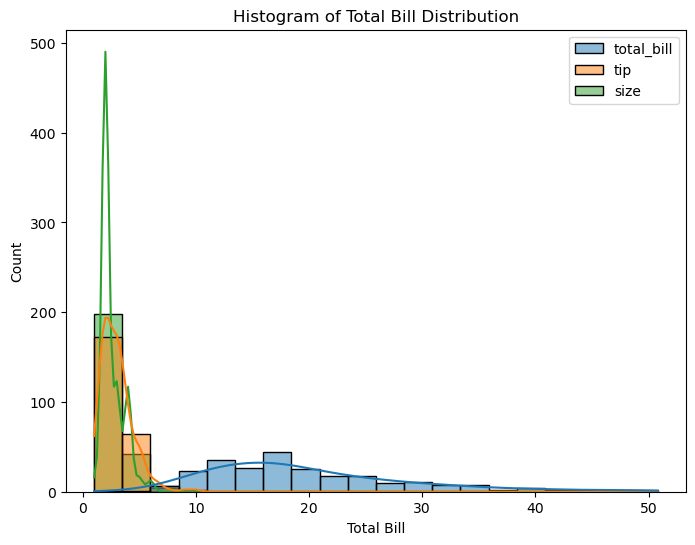

In [33]:
plt.figure(figsize=(8, 6))
sns.histplot(df, kde=True, color='skyblue')
plt.xlabel('Total Bill')
plt.title('Histogram of Total Bill Distribution')
plt.show()

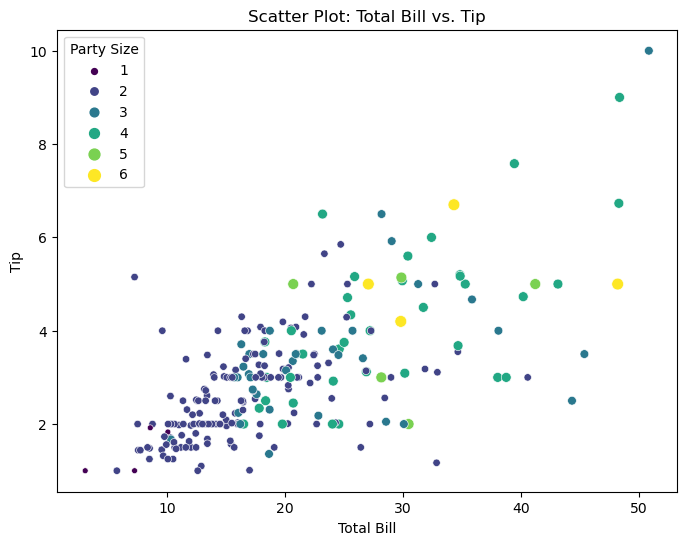

In [35]:
# Scatter plot to visualize the relationship between "total_bill" and "tip"
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='total_bill', y='tip', hue='size', palette='viridis', size='size')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Scatter Plot: Total Bill vs. Tip')
plt.legend(title='Party Size')
plt.show()

In [37]:
# Correlation matrix
correlation_matrix = df[['total_bill', 'tip', 'size']].corr()

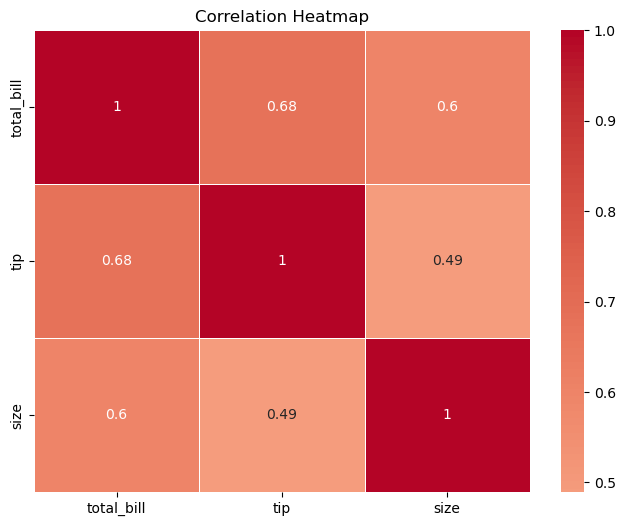

In [38]:
# Heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [39]:
# Check for missing values
print(df.isnull().sum())

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


In [42]:
# Check for duplicate rows
print(df.duplicated().sum())

# Drop duplicate rows
tips = df.drop_duplicates()

1


In [70]:
df.replace({'sex':{'Male':0,'Female':1}})


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,1,No,Sun,Dinner,2
1,10.34,1.66,0,No,Sun,Dinner,3
2,21.01,3.50,0,No,Sun,Dinner,3
3,23.68,3.31,0,No,Sun,Dinner,2
4,24.59,3.61,1,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,0,No,Sat,Dinner,3
240,27.18,2.00,1,Yes,Sat,Dinner,2
241,22.67,2.00,0,Yes,Sat,Dinner,2
242,17.82,1.75,0,No,Sat,Dinner,2


In [56]:
# Separate features (X) and target variable (y)
X = tips[['total_bill']]
y = tips['tip']

# Split the data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=66)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [62]:
prediction=model.predict(X_test)

In [64]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, prediction)
print("Mean Squared Error:", mse)

r2 = r2_score(y_test, prediction)
print("R-squared:", r2)

Mean Squared Error: 0.8921756938701546
R-squared: 0.40507268024301324


In [72]:
new=np.array([0,1,3,1,0,0,0]).reshape(1,-1)
new

array([[0, 1, 3, 1, 0, 0, 0]])